In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import itertools
import collections
import pickle
%matplotlib inline 
import sys
import os
sys.path.append("../data/")
import seaborn as sns
sns.set(color_codes=True)


C:\Users\vhim98198\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  
    


In [3]:
# tableau color blind 10

tableau_cb10= [(31,119,180), (255,127,14), (44,160,44), (214,39,40), (148,103,189),
                (140,86,75), (227,119,194), (127,127,127), (188,189,34), (23,190,207)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau_cb10)):    
    r, g, b = tableau_cb10[i]    
    tableau_cb10[i] = (r / 255., g / 255., b / 255.)



In [4]:
def load_pkl(filename):
    
    """
    Function accepts a .pkl filename and loads (de-serializes) object
    """
    
    with open(filename, "r") as infile:
        obj = pickle.load(infile)
        return obj

In [5]:
pickled_files= os.listdir('../data')

names= [os.path.splitext(f)[0] for f in pickled_files]

cond= [name.split('data_dict_')[1] for name in names]

cond

['0p1_0p1_0p25',
 '0p1_0p1_0p5',
 '0p1_0p25_0p1',
 '0p1_0p5_0p1',
 '0p1_0p9_0p1',
 '0p1_0p9_0p25',
 '0p1_0p9_0p5',
 '0p25_0p1_0p25',
 '0p25_0p9_0p1',
 '0p5_0p9_0p1',
 'alphap1_gammap25_epsp1',
 'alphap1_gammap5_epsp1',
 'alphap1_gammap9_epsp1',
 'alphap1_gammap9_epsp25',
 'alphap1_gammap9_epsp5',
 'alphap25_gammap9_epsp1',
 'alphap5_gammap9_epsp1']

In [6]:
# get files from corrected q_learn code

cond= [x for x in cond if x[0] != 'a']

In [7]:
pickled_files= [x for x in pickled_files if 'al' not in x]

In [8]:
name_cond_map= dict(zip(pickled_files, cond))

name_cond_map

{'data_dict_0p1_0p1_0p25.pkl': '0p1_0p1_0p25',
 'data_dict_0p1_0p1_0p5.pkl': '0p1_0p1_0p5',
 'data_dict_0p1_0p25_0p1.pkl': '0p1_0p25_0p1',
 'data_dict_0p1_0p5_0p1.pkl': '0p1_0p5_0p1',
 'data_dict_0p1_0p9_0p1.pkl': '0p1_0p9_0p1',
 'data_dict_0p1_0p9_0p25.pkl': '0p1_0p9_0p25',
 'data_dict_0p1_0p9_0p5.pkl': '0p1_0p9_0p5',
 'data_dict_0p25_0p1_0p25.pkl': '0p25_0p1_0p25',
 'data_dict_0p25_0p9_0p1.pkl': '0p25_0p9_0p1',
 'data_dict_0p5_0p9_0p1.pkl': '0p5_0p9_0p1'}

dfs= dict()
for f in pickled_files:
    
    pkl_file= os.path.join('data/', f)
    df= pd.DataFrame(load_pkl(pkl_file))
    condition= name_cond_map[f]
    dfs[condition]= df

    # probably read into a datframe etc. etc. and concat
    
    # http://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
    

In [9]:
dfs= list()
for f in pickled_files:
    
    pkl_file= os.path.join('../data/', f)
    df= pd.DataFrame(load_pkl(pkl_file))
    dfs.append(df)

In [10]:
parameter_names= [x.split('data_dict_')[1] for x in pickled_files]
parameter_names= [x.split('.')[0] for x in parameter_names]
parameter_names

['0p1_0p1_0p25',
 '0p1_0p1_0p5',
 '0p1_0p25_0p1',
 '0p1_0p5_0p1',
 '0p1_0p9_0p1',
 '0p1_0p9_0p25',
 '0p1_0p9_0p5',
 '0p25_0p1_0p25',
 '0p25_0p9_0p1',
 '0p5_0p9_0p1']

In [11]:
i= 0
for condition in cond:
    dfs[i]['condition']= condition
    i += 1

In [12]:
big_df= pd.concat(dfs)

In [13]:
big_df.head()

,lenq,qtables,successes,condition
0,1,"{((u'red', u'forward', None, None, u'left'), N...",0,0p1_0p1_0p25
1,2,"{((u'red', u'forward', None, None, u'left'), N...",0,0p1_0p1_0p25
2,2,"{((u'red', u'forward', None, None, u'left'), N...",0,0p1_0p1_0p25
3,3,"{((u'red', u'forward', None, None, u'left'), N...",0,0p1_0p1_0p25
4,4,"{((u'red', u'forward', None, None, u'left'), N...",0,0p1_0p1_0p25


In [14]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14494 entries, 0 to 1458
Data columns (total 4 columns):
lenq         14494 non-null int64
qtables      14494 non-null object
successes    14494 non-null int64
condition    14494 non-null object
dtypes: int64(2), object(2)
memory usage: 452.9+ KB


In [15]:
lenqs= big_df[['lenq', 'condition']]

In [16]:
lenqs= lenqs.pivot(columns= 'condition', values= 'lenq')

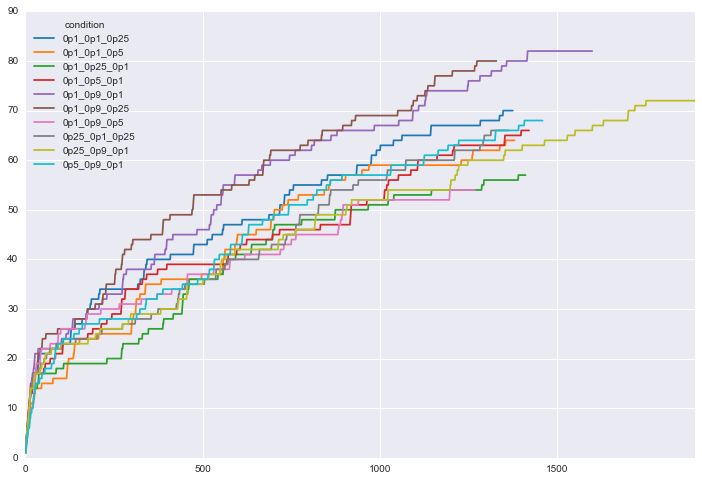

In [35]:
lenqs.plot(color= tableau_cb10, figsize= (12, 8))

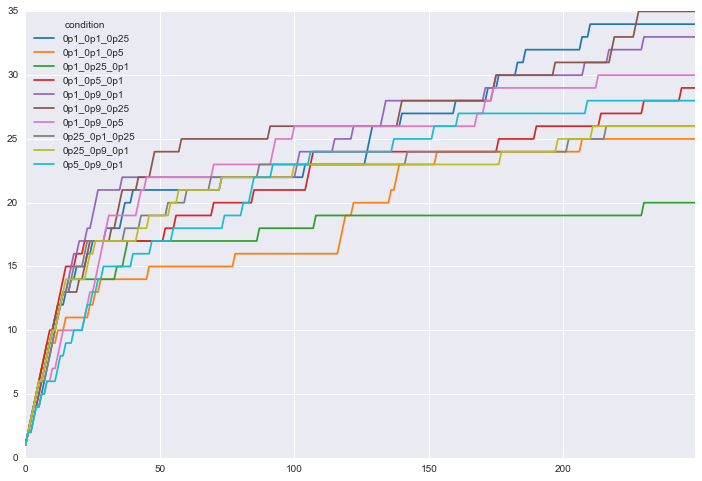

In [36]:
lenqs.iloc[0:250].plot(color= tableau_cb10, figsize= (12, 8))

In [19]:
succ_piv= big_df[['successes', 'condition']].pivot(columns= 'condition', values= 'successes')

In [20]:
succ_piv.describe().loc[['mean', 'std']]

condition,0p1_0p1_0p25,0p1_0p1_0p5,0p1_0p25_0p1,0p1_0p5_0p1,0p1_0p9_0p1,0p1_0p9_0p25,0p1_0p9_0p5,0p25_0p1_0p25,0p25_0p9_0p1,0p5_0p9_0p1
mean,0.069818,0.071014,0.070163,0.068966,0.057536,0.071482,0.078864,0.072634,0.038645,0.066484
std,0.254933,0.256942,0.255512,0.253485,0.232937,0.257726,0.269633,0.259630,0.192798,0.249211


In [21]:
big_df.groupby('condition')['successes'].mean().sort_values(ascending= False)

condition
0p1_0p9_0p5      0.078864
0p25_0p1_0p25    0.072634
0p1_0p9_0p25     0.071482
0p1_0p1_0p5      0.071014
0p1_0p25_0p1     0.070163
0p1_0p1_0p25     0.069818
0p1_0p5_0p1      0.068966
0p5_0p9_0p1      0.066484
0p1_0p9_0p1      0.057536
0p25_0p9_0p1     0.038645
Name: successes, dtype: float64

In [22]:
big_df.groupby('condition')['successes'].sum().sort_values(ascending= False)

condition
0p1_0p9_0p5      100
0p25_0p1_0p25     99
0p1_0p25_0p1      99
0p1_0p5_0p1       98
0p1_0p1_0p5       98
0p5_0p9_0p1       97
0p1_0p1_0p25      96
0p1_0p9_0p25      95
0p1_0p9_0p1       92
0p25_0p9_0p1      73
Name: successes, dtype: int64

In [23]:
base_cond_df= big_df[big_df.condition== '0p1_0p9_0p1']

In [24]:
lenqs.max().sort_values(ascending= False)

condition
0p1_0p9_0p1      82.0
0p1_0p9_0p25     80.0
0p25_0p9_0p1     72.0
0p1_0p1_0p25     70.0
0p5_0p9_0p1      68.0
0p25_0p1_0p25    66.0
0p1_0p5_0p1      66.0
0p1_0p1_0p5      64.0
0p1_0p25_0p1     57.0
0p1_0p9_0p5      54.0
dtype: float64

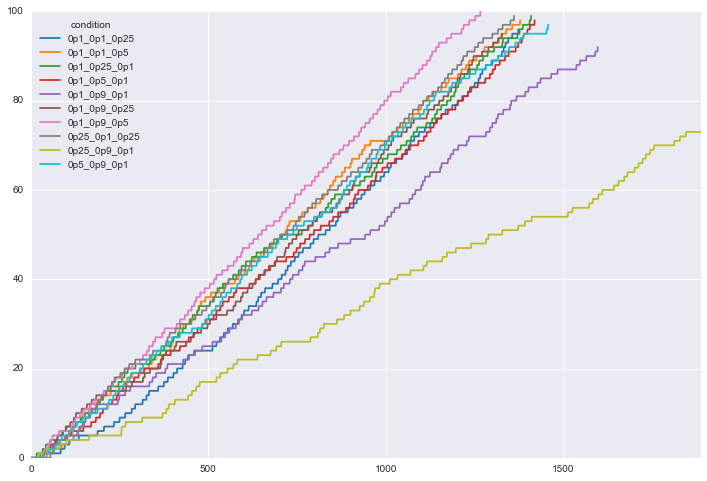

In [37]:
big_df.pivot(columns= 'condition', values= 'successes').cumsum().plot(color= tableau_cb10, figsize= (12, 8))

In [26]:
max_base_q= max(base_cond_df.iloc[1237].qtables.values())

In [27]:
policy= base_cond_df.iloc[1237].qtables.keys()[base_cond_df.iloc[1237].qtables.values().index(max_base_q)]

In [28]:
q_piv= big_df.pivot(columns= 'condition', values= 'qtables')   

In [29]:
lener= lambda x: len(x)

In [30]:
set(big_df.condition)

{'0p1_0p1_0p25',
 '0p1_0p1_0p5',
 '0p1_0p25_0p1',
 '0p1_0p5_0p1',
 '0p1_0p9_0p1',
 '0p1_0p9_0p25',
 '0p1_0p9_0p5',
 '0p25_0p1_0p25',
 '0p25_0p9_0p1',
 '0p5_0p9_0p1'}

In [31]:
q_1_9_1= big_df[big_df.condition== '0p1_0p9_0p1'].qtables[1598]

In [32]:
q_1_9_5= big_df[big_df.condition== '0p1_0p9_0p5'].qtables[1267]

In [39]:
q_1_9_5

{(('green', None, None, None, 'forward'), 'forward'): 7.675603101959724,
 (('green', None, None, None, 'left'), None): 0.0,
 (('green', None, None, None, 'left'), 'left'): 7.015414916808173,
 (('green', None, None, None, 'left'), 'right'): -0.05,
 (('green', None, None, None, 'right'), None): 0.0,
 (('green', None, None, None, 'right'), 'left'): -0.05,
 (('green', None, None, None, 'right'), 'right'): 7.127456058551888,
 (('green', None, None, 'forward', 'forward'), 'forward'): 0.5582,
 (('green', None, None, 'forward', 'right'), 'left'): -0.031999999999999994,
 (('green', None, None, 'left', 'forward'), 'forward'): 0.5582,
 (('green', None, None, 'left', 'forward'), 'right'): -0.031999999999999994,
 (('green', None, None, 'left', 'right'), 'right'): 0.542,
 (('green', None, None, 'right', 'forward'), 'forward'): 2.2800000000000002,
 (('green', None, None, 'right', 'left'), None): 0.0,
 (('green', None, 'forward', None, 'forward'), None): 0.0,
 (('green', None, 'forward', None, 'forwar

In [40]:
fastest= q_1_9_5.keys()
largest= q_1_9_1.keys()


In [41]:
largest_fastest= [x for x in largest if x not in fastest]

In [42]:
len(largest_fastest)


52

In [43]:
fastest_largest= [x for x in fastest if x not in largest]

In [44]:
len(fastest_largest)

24

In [45]:
lf= list()
for item in largest_fastest:
    val= q_1_9_1.get(item)
    if val > 0:
        pair= (item, val)
        lf.append(pair)

In [46]:
lf

[((('green', None, None, 'forward', 'right'), 'right'), 0.56),
 ((('green', None, 'left', None, 'left'), 'left'), 0.2),
 ((('green', 'right', None, None, 'right'), 'right'), 1.0728817731752178),
 ((('green', None, 'right', None, 'left'), 'left'), 0.2),
 ((('green', None, 'right', None, 'right'), 'right'), 0.2),
 ((('green', None, None, 'left', 'left'), 'left'), 0.2),
 ((('green', 'left', None, None, 'forward'), 'left'), 2.538488747917375),
 ((('green', 'forward', None, None, 'right'), 'forward'), 1.610371982973119)]

In [47]:
fl= list()
for item in fastest_largest:
    val= q_1_9_5.get(item)
    if val > 0:
        pair= (item, val)
        fl.append(pair)

In [48]:
fl

[((('red', 'left', None, None, 'right'), 'right'), 0.4518415754314937),
 ((('green', None, 'left', None, 'forward'), 'forward'), 3.5702372),
 ((('green', None, None, 'left', 'forward'), 'forward'), 0.5582),
 ((('green', None, 'forward', None, 'forward'), 'forward'), 0.398),
 ((('green', None, 'left', None, 'right'), 'right'), 0.542),
 ((('green', 'forward', None, None, 'forward'), 'forward'),
  1.2800000000000002),
 ((('green', 'left', None, None, 'right'), 'forward'), 0.5248207968130907)]

### Generate  all policies

In [ ]:
traffic_light_states= ['red', 'green']
valid_actions= [None, 'forward', 'left', 'right']

In [ ]:
# state products
states= tuple(itertools.product(traffic_light_states,valid_actions, valid_actions, valid_actions, valid_actions))

states2= tuple(itertools.product(traffic_light_states,valid_actions, valid_actions, valid_actions))

states3= tuple(itertools.product(traffic_light_states,valid_actions, valid_actions))

In [ ]:
# product of states and actions
policies= tuple(itertools.product(states, valid_actions))
policies2= tuple(itertools.product(states2, valid_actions))
policies3= tuple(itertools.product(states3, valid_actions))

In [ ]:
len(policies)

In [ ]:
len(policies2)

In [ ]:
len(policies3)

In [ ]:
2 * 4 * 4 * 4 *4

In [ ]:
policies_dict= dict(zip(policies, [list() for item in policies]))

In [ ]:
policies_dict

In [ ]:
for key in policies_dict.keys():
    policies_dict[key]= range(5)

In [ ]:
policies_dict

In [ ]:
[key for key in policies_dict if key in df.qtables[10].keys()]

### Setup Mappings

- map each potential policy to a number
- map each value to a number

This was we can just use numbers as the keys then convert back to the actual policy if needed

In [ ]:
keys= policies_dict.keys()
nums= range(len(keys))

pol_map= dict(zip(keys, nums))

vals= policies_dict.values()

map_pol= dict(zip(nums, vals))

In [ ]:
pd.DataFrame(map_pol).transpose()